<a href="https://colab.research.google.com/github/ancestor9/Gyeongbok-AI-study/blob/main/Astronomy_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **[Henrietta Swan Leavitt](https://en.wikipedia.org/wiki/Henrietta_Swan_Leavitt)**

- Henrietta Swan Leavitt는 1908년 소마젤란은하(Small Magellanic Cloud)의 세페이드 변광성(Cepheid variables)을 연구하던 중, 이들의 밝기와 변광 주기 사이에 상관관계가 있음을 발견했습니다. 그녀는 세페이드 변광성의 변광 주기와 광도 사이의 관계를 그래프로 나타내어, 변광 주기가 길수록 광도가 밝아진다는 사실을 밝혀냈습니다. 이러한 발견은 천문학자들이 우주의 거리를 측정하는 데 중요한 도구가 되었습니다.
WIKIPEDIA

- 레빗의 연구는 회귀분석과 밀접한 관련이 있습니다. 그녀는 세페이드 변광성의 변광 주기와 광도 사이의 선형적인 관계를 발견하였는데, 이는 회귀분석에서 두 변수 간의 선형 관계를 파악하는 것과 유사합니다. 레빗은 변광 주기와 광도 사이의 관계를 수학적으로 표현하여, 변광 주기를 알면 해당 별의 광도를 예측할 수 있는 방법을 제시하였습니다. 이러한 접근법은 회귀분석의 기본 원리와 일치하며, 천문학에서 거리 측정의 표준 촛불(standard candle)로서 세페이드 변광성을 활용하는 기반이 되었습니다. **(cosmic distance ladder)**
WIKIPEDIA

<img src = "https://upload.wikimedia.org/wikipedia/commons/thumb/0/0c/Henrietta_Swan_Leavitt.jpg/330px-Henrietta_Swan_Leavitt.jpg">
<img src ="https://upload.wikimedia.org/wikipedia/commons/thumb/9/97/HSLeavittHSCr13Fig2_1912.jpg/375px-HSLeavittHSCr13Fig2_1912.jpg">

회귀식: Luminosity = 2.54 * Period + 9.10

새로운 주기에 대한 밝기 예측:
주기: 5.0, 예측 밝기: 21.78
주기: 10.0, 예측 밝기: 34.46
주기: 15.0, 예측 밝기: 47.14


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


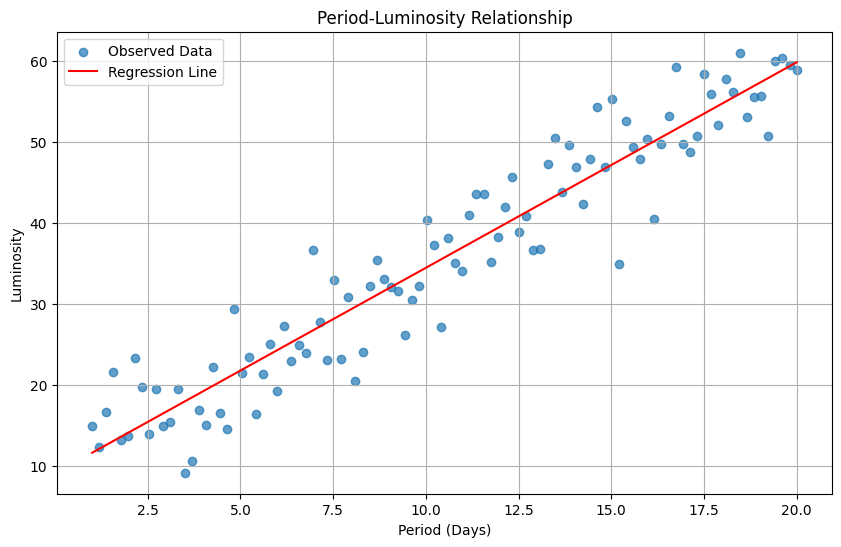

모델의 평균 제곱 오차 (MSE): 20.37


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 1. 데이터 생성
np.random.seed(42)
period = np.linspace(1, 20, 100)  # 주기 (1~20일 사이)
true_luminosity = 2.5 * period + 10  # 실제 광도: y = 2.5x + 10
noise = np.random.normal(0, 5, size=period.shape)  # 노이즈 추가
luminosity = true_luminosity + noise

data = pd.DataFrame({"Period": period, "Luminosity": luminosity})

# 2. 선형 회귀 모델 학습
X = data[["Period"]]  # 독립 변수
y = data["Luminosity"]  # 종속 변수

model = LinearRegression()
model.fit(X, y)

# 회귀 계수 출력
slope = model.coef_[0]
intercept = model.intercept_
print(f"회귀식: Luminosity = {slope:.2f} * Period + {intercept:.2f}")

# 3. 예측
data["Predicted_Luminosity"] = model.predict(X)

# 새로운 데이터로 예측
new_periods = np.array([[5], [10], [15]])
new_predictions = model.predict(new_periods)
print("\n새로운 주기에 대한 밝기 예측:")
for p, l in zip(new_periods.flatten(), new_predictions):
    print(f"주기: {p:.1f}, 예측 밝기: {l:.2f}")

# 4. 시각화
plt.figure(figsize=(10, 6))
plt.scatter(data["Period"], data["Luminosity"], label="Observed Data", alpha=0.7)
plt.plot(data["Period"], data["Predicted_Luminosity"], color="red", label="Regression Line")
plt.xlabel("Period (Days)")
plt.ylabel("Luminosity")
plt.title("Period-Luminosity Relationship")
plt.legend()
plt.grid()
plt.show()

# 5. 해석
mse = mean_squared_error(y, data["Predicted_Luminosity"])
print(f"모델의 평균 제곱 오차 (MSE): {mse:.2f}")


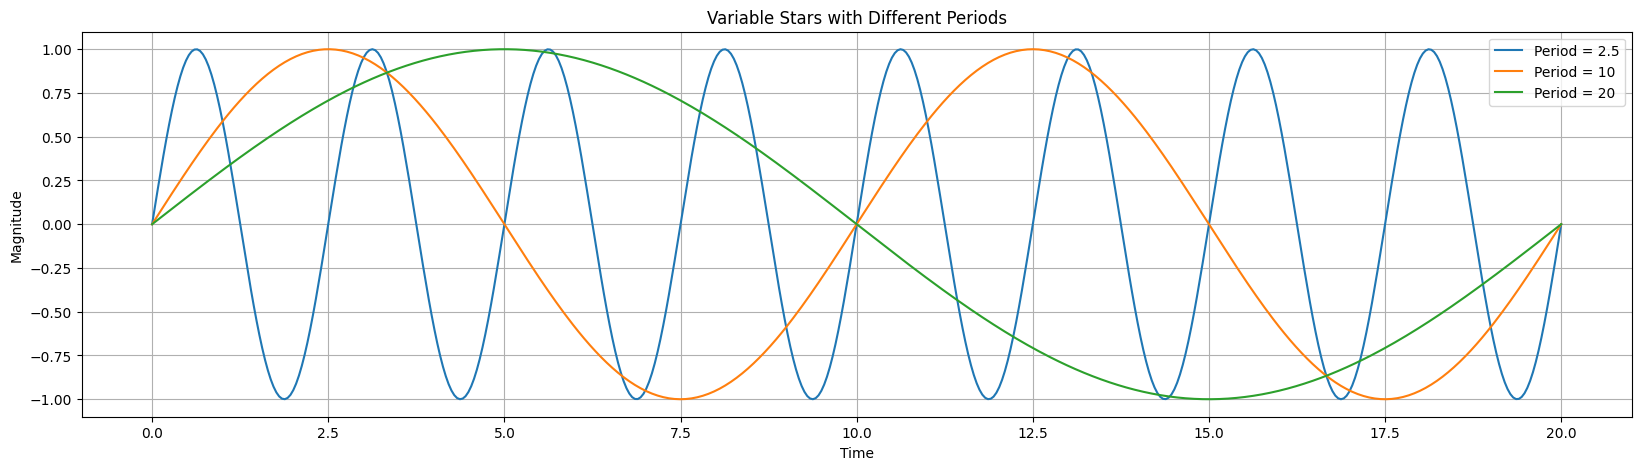

In [6]:
# prompt: Period가 2.5, 10, 20 인 경우의 변광성을 사인곡선 형태로 시각화하여 보여주라. Time은 20으로, 시각화 크기는 (20,5) 그림은 한장에 같이 그려줘

import numpy as np
import matplotlib.pyplot as plt

# Time vector
time = np.linspace(0, 20, 500)

# Periods
periods = [2.5, 10, 20]

# Create the figure and axes
plt.figure(figsize=(20, 5))

# Plot each sine wave
for period in periods:
    amplitude = 1  # You can adjust the amplitude
    y = amplitude * np.sin(2 * np.pi * time / period)
    plt.plot(time, y, label=f'Period = {period}')

# Customize the plot
plt.xlabel('Time')
plt.ylabel('Magnitude')
plt.title('Variable Stars with Different Periods')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()